# Système de prêt bancaire

In [250]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sbn 
from sklearn.metrics import accuracy_score
from tqdm import tqdm

### Importation des données

In [251]:
prets = pd.read_csv("prets.csv")
prets.head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014


### Visualisation du **taux** en fonction du **revenu** pour chaque type de prêt

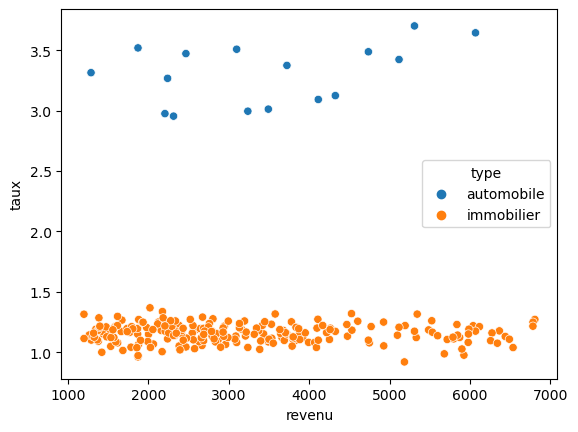

In [252]:
prets = prets.sort_values("type")
sbn.scatterplot(data=prets,x="revenu",y="taux", hue="type")
plt.show()

### Implémentation: **Modèle de neurone artificiel**

#### Création du dataset

In [253]:
dataset = prets[["revenu","taux","type"]]

dataset_automobile = dataset.loc[prets["type"]=="automobile"].iloc[:16]
dataset_immobilier = dataset.loc[prets["type"]=="immobilier"].iloc[:16]

dataset = pd.concat([dataset_automobile,dataset_immobilier])

dataset.loc[dataset["type"]=="automobile","type"]=0
dataset.loc[dataset["type"]=="immobilier","type"]=1

X = np.array(dataset[["revenu","taux"]])
X[:,0] = (X[:,0] - X[:,0].min()) / (X[:,0].max() - X[:,0].min())
X[:,1] = (X[:,1] - X[:,1].min()) / (X[:,1].max() - X[:,1].min())

y = np.array(dataset["type"]) 
y = y.astype(int)
y = y.reshape(y.shape[0],1)

#### Visualisation de la variable **X**

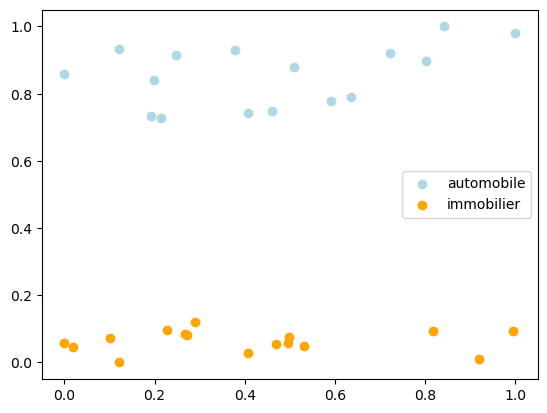

In [254]:
plt.scatter(X[:16,0], X[:16,1],c="lightblue", label="automobile")
plt.scatter(X[16:,0], X[16:,1],c="orange", label="immobilier")
plt.legend()
plt.show()

#### Fonction d'initialisation des parametres **W** et **b**

In [255]:
def initialisation(X):
    W = np.random.randn(X.shape[1],1)
    b = np.random.randn(1)
    return (W,b)

#### Model du neurone artificiel

In [256]:
def model(X,W,b):
    Z = X @ W + b 
    A = 1 / ( 1 + np.exp(-Z))
    return A

#### Fonction coût : **Log Loss**

In [257]:
def log_loss(A,y):
    epsilon = 1e-15
    return 1 / len(y) * np.sum( -y * np.log( A + epsilon ) - (1 - y) * np.log( 1 - A + epsilon ))

#### Fonction de calcul des gradients

In [258]:
def gradient(X,A,y):
    dW = 1 / len(y) * (X.T @ (A - y))
    db = 1 / len(y) * np.sum (A -y)
    return (dW,db)

((2, 1), ())

#### Fonction de mise à jour des paramètre **W** et **b**

In [259]:
def update(W,b, dW,db, alpha):
    W = W - alpha * dW
    b = b - alpha * db
    return (W,b)


((2, 1), (1,))

#### Fonction de prédiction des données

In [260]:
def predict(X,W,b):
    A = model(X,W,b)
    return A >= 0.5

#### Fonction de visualisation d'évolution de données

In [261]:
def figure(tab,label,title):
    plt.title(title)
    plt.plot(tab, label=label)
    plt.legend()

#### Fonction de visualisation des données

In [267]:
def scatter_X(X,W,b):
    #Nuage de point
    plt.title("Taux d'interêt en fonction du revenu")
    plt.scatter(X[:16,0], X[:16,1],c="lightblue", label="automobile")
    plt.scatter(X[16:,0], X[16:,1],c="orange", label="immobilier")
    plt.xlabel("Revenu")
    plt.ylabel("Taux d'interêt")

    #Frontière de décision
    x0 = np.linspace(0,1.0,32)
    x1 = (-x0*W[0] - b) / W[1]
    plt.plot(x0,x1)
    
    #Nouvelle données
    new_data=np.array([0.1,0.3])
    plt.scatter(new_data[0],new_data[1], c="red", label="Nouvelle donnée")

    if predict(new_data,W,b):
        print("Donnée est de type : 'immobilier'")
    else: 
        print("Donnée est de type : 'automobile'")
        
    plt.legend(bbox_to_anchor=(1.02,1.02))
    
    

#### Fonction d'apprentissage: **Descente de gradient**

In [263]:
def artificial_neuron(X,y, alpha, n_iter):
    W,b = initialisation(X)
    loss=[]
    acc=[]
    for i in tqdm(range(n_iter)):
        A = model(X,W,b)
        y_pred = predict(X,W,b)
        acc.append(accuracy_score(y,y_pred))
        loss.append(log_loss(A,y))
        dW, db = gradient(X,A,y)
        W,b = update(W,b,dW,db,alpha)

    print(f"Performance à : {accuracy_score(y,y_pred):.2%}")

    return (W,b,loss,acc)

In [264]:
W,b,loss,acc=artificial_neuron(X,y,0.1,100)

100%|██████████| 100/100 [00:00<00:00, 530.51it/s]

Performance à : 100.00%


#### Fonction de principal

In [265]:
def predict_data(W,b,loss,acc):
    plt.figure(figsize=(20,4))
    
    plt.subplot(1,3,1)
    #Répresentation de la courbe d'apprentissage 
    figure(loss,"Log Loss","Courbe d'apprentissage")
    plt.subplot(1,3,2)
    #Répresentation de la courbe de performance
    figure(acc,"Performance","Courbe de performance")
    plt.subplot(1,3,3)
    #Répresentation du dataset de la frontière de décision
    scatter_X(X,W,b)
    plt.grid()
    plt.show()

Donnée est de type : 'immobilier'


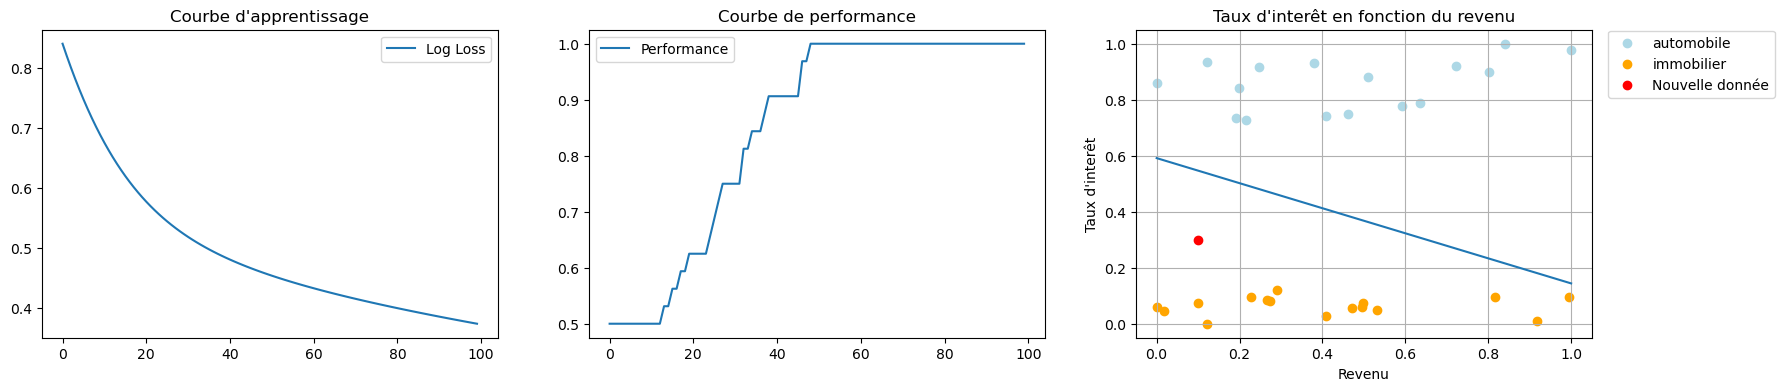

In [268]:
predict_data(W,b,loss,acc)